In [1]:
import qutip as qt
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
from lmfit import Model
from qutip.qip.operations import rotation

π = np.pi
_ = %precision 3

In [2]:
def blochvector(theta, phi, p):
    r = [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]
    bloch_sphere = qt.Bloch(figsize=(3,3))
    bloch_sphere.add_vectors(r)
    if p:
        bloch_sphere.show()
    return r

def torho(blochvec):
    x = blochvec[0]
    y = blochvec[1]
    z = blochvec[2]

    rho = 0.5*(qt.qeye(2) + x*sx + y*sy + z*sz)
    return rho

def tobloch(rho):
    a = rho[0,0]
    b = rho[1,0]
    c = rho[0,1]
    d = rho[1,1]
    
    x = 2*np.real(b)
    y = 2*np.imag(b)
    z = 2*a - 1
    
    return [x, y, z]

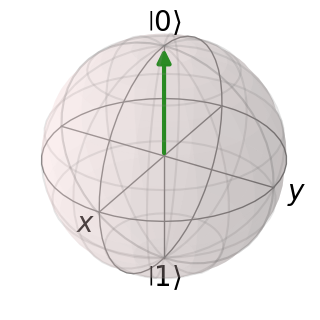

In [3]:
theta = 0
phi = 0
vec = blochvector(theta, phi, True)

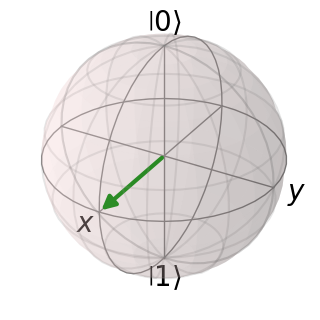

[1.000, 0.000, 0.000]

In [5]:
blochvector(π/2, phi, True)

In [6]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

In [7]:
pp = rotation(sy, π/2) #π/2 pulse

In [8]:
g_state = qt.basis(2, 0)
e_state = qt.basis(2, 1)

In [11]:
g_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [9]:
pp*g_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.707]
 [0.707]]

In [10]:
state = pp*e_state
state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.707]
 [ 0.707]]